# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [ ]:
df = pd.read_csv('/content/Balaji Fast Food Sales.csv')

In [ ]:
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [ ]:
df.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


In [ ]:
df.describe(include='object')

,date,item_name,item_type,transaction_type,received_by,time_of_sale
count,1000,1000,1000,893,1000,1000
unique,348,7,2,2,2,5
top,8/31/2022,Cold coffee,Fastfood,Cash,Mr.,Night
freq,8,161,686,476,512,205


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
order_id,0
date,0
item_name,0
item_type,0
item_price,0
quantity,0
transaction_amount,0
transaction_type,107
received_by,0
time_of_sale,0


# Data Cleaning

In [ ]:
df['date'] = pd.to_datetime(df['date'].str.replace('-', '/'), errors='coerce')

In [ ]:
df["transaction_type"].mode()

,transaction_type
0,Cash


In [ ]:
df["transaction_type"]=df["transaction_type"].fillna("Cash")

In [ ]:
df.isnull().sum()

,0
order_id,0
date,0
item_name,0
item_type,0
item_price,0
quantity,0
transaction_amount,0
transaction_type,0
received_by,0
time_of_sale,0


In [ ]:
df.set_index("order_id", inplace=True)

# Data Visualization

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy['time_of_sale'].unique()

array(['Night', 'Afternoon', 'Evening', 'Morning', 'Midnight'],
      dtype=object)

In [ ]:
df_copy['transaction_type']= df['transaction_type'].map({"Cash":1,"Online":0})
df_copy["received_by"] = df["received_by"].map({"Mr.":1,"Mrs.":0})
df_copy["time_of_sale"] = df["time_of_sale"].map({"Night":0,"Afternoon":1,"Evening":2,"Morning":3,"Midnight":4})

In [ ]:
numeric = df_copy.select_dtypes(include='number')

<Axes: >

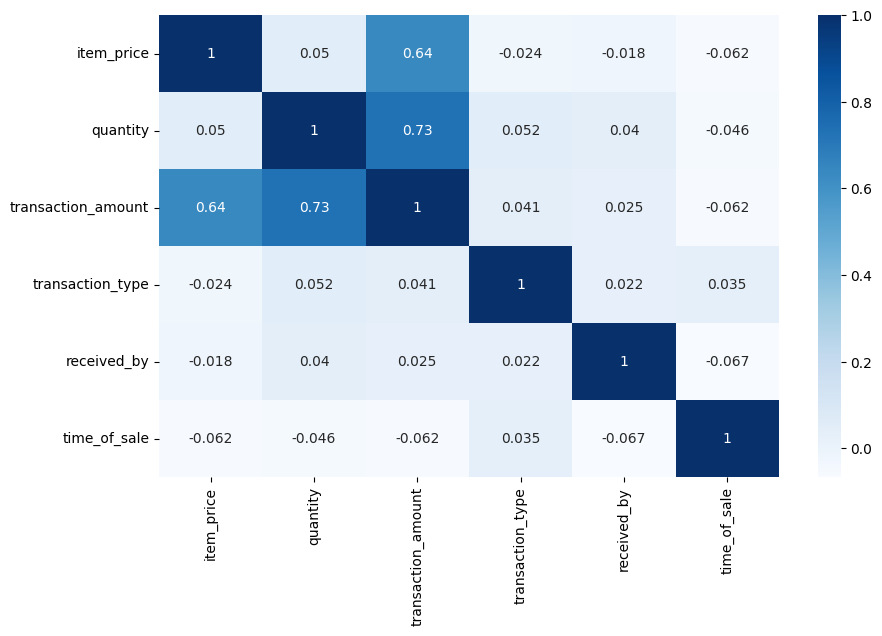

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric.corr(), annot=True , cmap='Blues')

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'item_price'}>],
       [<Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'transaction_amount'}>]], dtype=object)

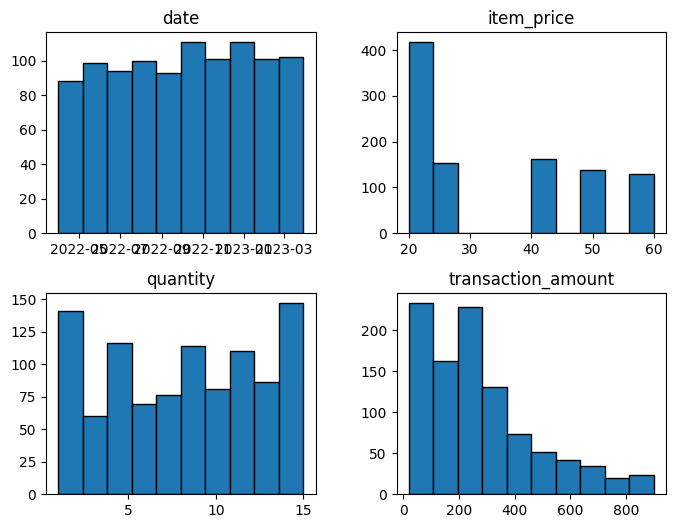

In [ ]:
df.hist(bins=10, edgecolor="black", figsize=(8, 6) , grid=False)

<Axes: xlabel='transaction_amount'>

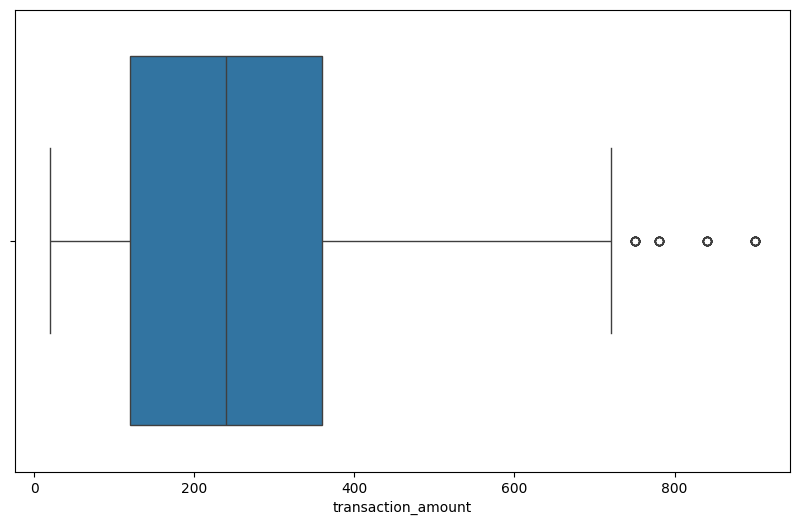

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='transaction_amount')

#  Handling Outliers

In [ ]:
Q1 = df["transaction_amount"].quantile(0.25)
Q3 = df["transaction_amount"].quantile(0.75)

IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df["transaction_amount"] = df["transaction_amount"].clip(upper=upper_bound)

<Axes: xlabel='transaction_amount'>

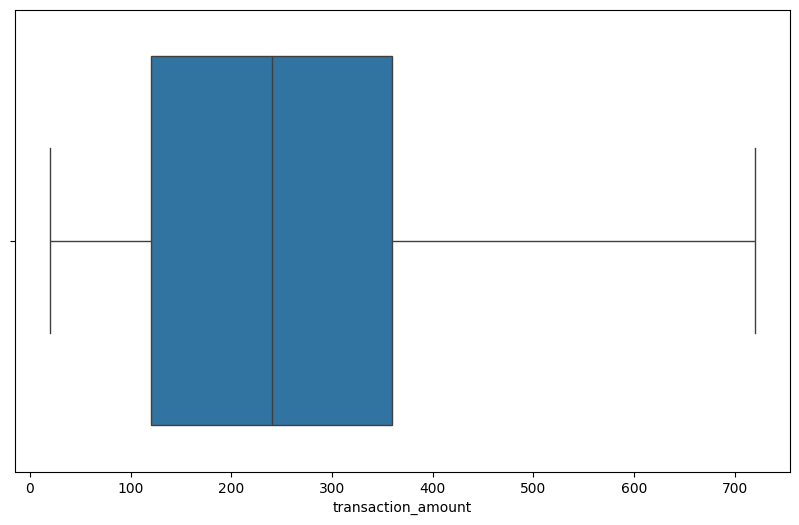

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='transaction_amount')

In [ ]:
df

,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
order_id,,,,,,,,,
1,2022-07-03,Aalopuri,Fastfood,20,13,260,Cash,Mr.,Night
2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...
996,2023-03-19,Frankie,Fastfood,50,10,500,Cash,Mrs.,Evening
997,2022-09-20,Sandwich,Fastfood,60,7,420,Cash,Mr.,Evening
998,2023-01-26,Sandwich,Fastfood,60,13,720,Cash,Mr.,Evening


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1000 non-null   datetime64[ns]
 1   item_name           1000 non-null   object        
 2   item_type           1000 non-null   object        
 3   item_price          1000 non-null   int64         
 4   quantity            1000 non-null   int64         
 5   transaction_amount  1000 non-null   int64         
 6   transaction_type    1000 non-null   object        
 7   received_by         1000 non-null   object        
 8   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 78.1+ KB


# Saving data

In [ ]:
df.to_csv('Restaurant sales.csv', index=False)